In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import TwoSlopeNorm
from IPython.display import clear_output
import datetime
from dateutil.relativedelta import *

In [2]:
periods = ('D', 'W', 'M', 'Y')

In [3]:
df = pd.read_csv('crypto-markets.csv')

In [4]:
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,0.4421,3124.52


In [5]:
# Convert strings to dates
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [6]:
df.dtypes

slug                   object
symbol                 object
name                   object
date           datetime64[ns]
ranknow                 int64
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
market                float64
close_ratio           float64
spread                float64
dtype: object

In [7]:
'''
Get percentage of changing in price
start_price - price of cryptocurrency in the beginning of period of time
end_price - price of cryptocurrency in the end of period of time
return: float (in percentage)
'''
def get_var_percent(past_price, new_price):
    return (new_price / past_price - 1) * 100
'''
Get past date with period from starting date.
given_date - date from where we go in the past
period - 'D, W, M, Y'
where
number - changes withing given number.
letter - timeframe(D - day, W - week, M - month, Y - year)
return: date
'''
def get_past_date(given_date, period):
    if period not in periods:
        print('Unsupported period of time')
        return
    
    past_date = 0

    if period == 'D':
        past_date = given_date - datetime.timedelta(days=1)
    elif period == 'W':
        past_date = given_date - datetime.timedelta(weeks=1)
    elif period == 'M':
        past_date = given_date - relativedelta(months=1)
    elif period == 'Y':
        past_date = given_date - relativedelta(years=1)

    return past_date

'''
Get crypto price with given date
dataframe - data set from which to get a price
given_date - price at this date
return: float
'''
def get_crypto_by_date(given_date, symbol):
    try:
        return df[df['symbol'] == symbol].loc[df['date'] == given_date]['close'].iloc[-1]
    except:
        return df[df['symbol'] == symbol]['close'].iloc[0]
'''
Get variance of price with given timeframe
given_date - fresh date
period - period where we go into the past
symbol - cryptocurrency
return: variance of cryptocurrency with given period
'''
def get_var_by_dates(given_date, period, symbol):
    past_date = get_past_date(given_date, period)

    past_price = get_crypto_by_date(past_date, symbol)
    fresh_price = get_crypto_by_date(given_date, symbol)
    
    return get_var_percent(past_price, fresh_price)
'''
Get fresh date of cryptocurrency
symbol - cryptocurrency
return: newest date
'''
def get_fresh_date(symbol):
    return df[df['symbol'] == symbol]['date'].max()

### Input data

In [8]:
# Retrieve all names of cryptocurrencies
symbols = np.array(df['symbol'].unique())

In [9]:
# Choose number of cryptocurrencies to be shown
# crypto_count = symbols.size
crypto_count = 35
symbols_sub = symbols[:crypto_count]

# Timeframe
period = 'W'

In [10]:
# Find the nearest square to show heat map like square
i = 1
square = 1
while square < crypto_count:
    i += 1
    square = np.power(i, 2)

# Fill with gap extra cells
diff = square - crypto_count
null_array = np.full(diff, '')
symbols_sub = np.concatenate((symbols_sub, null_array), axis=0)

In [11]:
symbols_count = len(symbols_sub)
symbols_var = np.zeros(i * i)

# Calculate variances of cryptocurrency prices within given timeframe
for sym_iter in range(symbols_count):
    var = 0
    if symbols_sub[sym_iter] != '':
        fresh_date = get_fresh_date(symbols_sub[sym_iter])
        var = get_var_by_dates(fresh_date, period, symbols_sub[sym_iter])

    symbols_var[sym_iter] = var
    clear_output(wait=True)
    print(f'{sym_iter + 1}/{symbols_count}')

36/36


In [12]:
sqrt = int(np.sqrt(symbols_count))
symbols_sub = np.resize(symbols_sub, (sqrt, sqrt))
symbols_var = np.resize(symbols_var, (sqrt, sqrt))

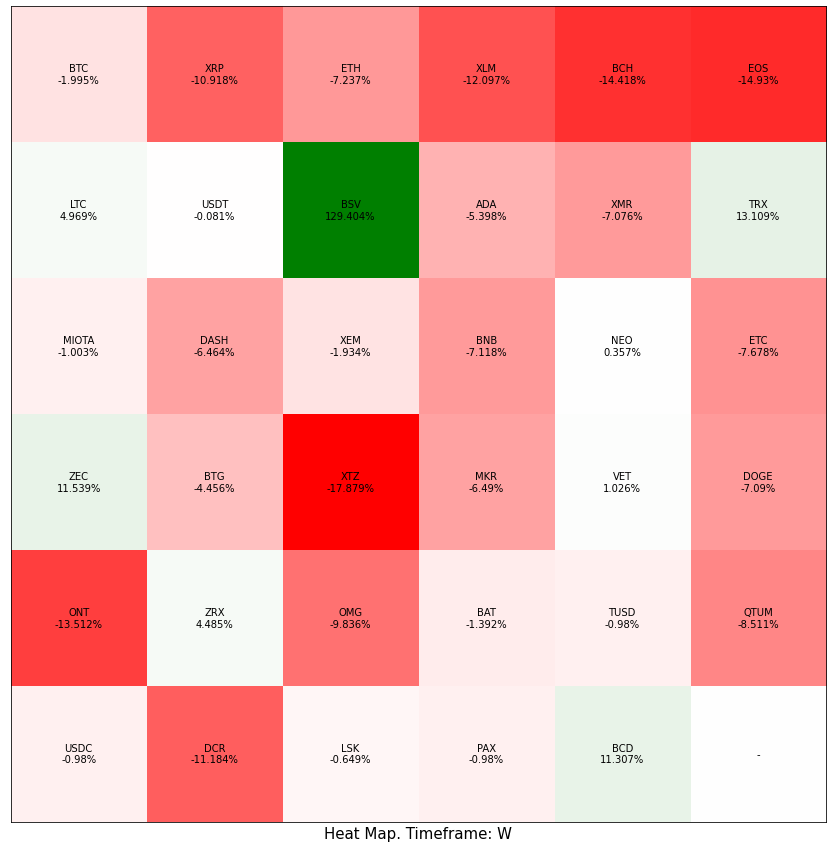

In [13]:
# Heat Map

rows = len(symbols_sub)
columns = len(symbols_sub[0])

fig, axs = plt.subplots(figsize=(15, 15))

green_red_cmap = LinearSegmentedColormap.from_list('rg',['r', 'w', 'g'], N=256)
my_norm = TwoSlopeNorm(vcenter=0, vmin=symbols_var.min(), vmax=symbols_var.max())

axs.imshow(symbols_var, cmap=green_red_cmap, norm=my_norm, interpolation='nearest')

for i in range(rows):
    for j in range(columns):
        text = ''
        if symbols_sub[i, j] == '':
            text = '-'
        else:
            text = f'{symbols_sub[i, j]}\n{np.round(symbols_var[i, j], 3)}%'
        axs.text(j, i, text, ha='center', va='center', fontsize=10)

axs.get_xaxis().set_ticks([])
axs.get_yaxis().set_ticks([])

axs.set_xlabel(f'Heat Map. Timeframe: {period}', fontsize=15)

plt.show()